# Импорты

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

# Выбор и загрузка данных

In [4]:
df = pd.read_csv('f1_dataset.csv')

# Изучение структуры данных

In [5]:
print(f"Размер датасета: {df.shape}")
print(df.info())
print(df.describe())
print(f"--- Типы данных ---\n{df.dtypes}")
print(f"--- Первые 5 записей ---\n{df.head(5)}")
print(f"--- Последние 5 записей --- \n{df.tail(5)}")

Размер датасета: (1142, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1142 non-null   object 
 1   continent    1142 non-null   object 
 2   grand_prix   1142 non-null   object 
 3   circuit      1142 non-null   object 
 4   winner_name  1142 non-null   object 
 5   team         1142 non-null   object 
 6   time         1142 non-null   object 
 7   laps         1142 non-null   float64
 8   year         1142 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 80.4+ KB
None
              laps         year
count  1142.000000  1142.000000
mean     64.617338  1992.999124
std      20.065139    20.850097
min       1.000000  1950.000000
25%      54.000000  1977.000000
50%      64.000000  1995.000000
75%      72.000000  2011.000000
max     200.000000  2025.000000
--- Типы данных ---
date            object
contin

# Предобработка данных

## Проверка на наличие пропущенных значений

In [2]:
print(df.isnull().sum())
# Сколько раз Хэмильтон выиграл в Европе
hamilton_wins = df[df['winner_name'] == 'Lewis Hamilton']
hamilton_in_europe = hamilton_wins[hamilton_wins['continent'] == 'Europe'].value_counts()

NameError: name 'df' is not defined

Исходя из отсутствия пропущенных значений, пропустим этот шаг

## Проверка на наличие дубликатов

In [7]:
print("Количество дубликатов:", df.duplicated().sum())

Количество дубликатов: 0


Исходя из отсутствия дубликатов, пропустим этот шаг

## Анализ выбросов

In [12]:
num_cols = df.select_dtypes(include=[np.number]).columns

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

mask = ~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print("Удалено выбросов:", (~mask).sum())

df = df[mask]


Удалено выбросов: 0


## Преобразование типов данных

In [14]:
df['date'] = pd.to_datetime(df['date'])

def time_to_seconds(t):
    if str(t).count(':') == 2:
        h, m, s = map(int, str(t).split(':'))
        return h * 3600 + m * 60 + s
    elif str(t).count(':') == 1:
        m, s = map(int, str(t).split(':'))
        return m * 60 + s
    return np.nan

df['time_seconds'] = df['time'].apply(time_to_seconds)

print("Типы данных после преобразования:")
print(df[['date', 'time_seconds']].dtypes)
df[['date', 'time', 'time_seconds']].head()

Типы данных после преобразования:
date            datetime64[ns]
time_seconds             int64
dtype: object


,date,time,time_seconds
0,1950-05-13,02:13:23,8003
3,1950-06-04,02:02:53,7373
4,1950-06-18,02:47:26,10046
5,1950-07-02,02:57:52,10672
6,1950-09-03,02:51:17,10277


## Создание новых переменных

Была создана переменная ```decade``` для анализа трендов в различных эпохи Формулы-1




In [17]:
df['decade'] = (df['year'] // 10) * 10
df[['year', 'decade']].head(10)

,year,decade
0,1950,1950
3,1950,1950
4,1950,1950
5,1950,1950
6,1950,1950
7,1951,1950
9,1951,1950
10,1951,1950
11,1951,1950
12,1951,1950


# Формулирование и выполнение аналитических запросов

1. Кто из гонщиков выигрывал чаще всего за всю историю?

In [18]:
top_10_drivers = df['winner_name'].value_counts().head(10)
print(top_10_drivers)

winner_name
Lewis Hamilton        105
Michael Schumacher     91
Max Verstappen         64
Sebastian Vettel       53
Alain Prost            51
Ayrton Senna           40
Fernando Alonso        32
Nigel Mansell          31
Niki Lauda             25
Nelson Piquet          23
Name: count, dtype: int64


2. Какие команды являются самыми успешными?

In [19]:
top_10_teams = df['team'].value_counts().head(10)
print(top_10_teams)

team
Ferrari                       238
Mercedes                      121
McLaren Mercedes               85
Williams Renault               64
Lotus Ford                     44
McLaren Honda                  43
Renault                        35
Red Bull Racing Renault        35
McLaren Ford                   34
Red Bull Racing Honda RBPT     30
Name: count, dtype: int64


3. На каких трассах прошло больше всего Гран-при?

In [20]:
top_10_circuits = df['circuit'].value_counts().head(10)
print(top_10_circuits)

circuit
Autodromo Nazionale di Monza      75
Silverstone Circuit               58
Circuit de Monaco                 57
Circuit de Spa Francorchamps      56
Circuit Gilles Villeneuve         44
Autodromo José Carlos Pace        41
Hungaroring                       40
Red Bull Ring                     39
Hockenheimring                    37
Circuit de Barcelona Catalunya    36
Name: count, dtype: int64


4. Как менялось среднее количество кругов в гонках по десятилетиям?

In [21]:
laps_by_decade = df.groupby('decade')['laps'].mean().round(1)
print(laps_by_decade)

decade
1950    68.8
1960    67.9
1970    66.4
1980    64.2
1990    64.3
2000    62.4
2010    59.9
2020    60.3
Name: laps, dtype: float64


5. Какой континент принял больше всего гонок?

In [22]:
races_by_continent = df['continent'].value_counts()
print(races_by_continent)

continent
Europe           644
Asia             163
North America    137
South America     71
Oceania           38
Africa            24
Name: count, dtype: int64


6. Кто самый успешный гонщик на трассе в Монако?

In [23]:
monaco_winners = df[df['circuit'] == 'Circuit de Monaco']['winner_name'].value_counts()
print(f"Лучший в Монако: {monaco_winners.index[0]} ({monaco_winners.iloc[0]} побед)")

Лучший в Монако: Ayrton Senna (6 побед)


7. Как распределяются победы между командами в XXI веке (с 2001 года)?

In [24]:
wins_21st_century = df[df['year'] >= 2001]['team'].value_counts().head(5)
print(wins_21st_century)

team
Mercedes                      121
Ferrari                       113
McLaren Mercedes               59
Red Bull Racing Renault        35
Red Bull Racing Honda RBPT     30
Name: count, dtype: int64


8. Есть ли корреляция между количеством кругов и временем гонки?

In [25]:
correlation_laps_time = df[['laps', 'time_seconds']].corr().iloc[0, 1]
print(f"Корреляция между кругами и временем: {correlation_laps_time:.2f}")

Корреляция между кругами и временем: 0.36


9. Сколько уникальных победителей было в каждом десятилетии?

In [26]:
unique_winners_by_decade = df.groupby('decade')['winner_name'].nunique()
print(unique_winners_by_decade)

decade
1950    14
1960    17
1970    29
1980    21
1990    17
2000    17
2010    12
2020    12
Name: winner_name, dtype: int64


10. На каком Гран-при в среднем самое длинное время гонки?

In [27]:
longest_races = df.groupby('grand_prix')['time_seconds'].mean().sort_values(ascending=False).head(5)
print(longest_races / 60) # в минутах

grand_prix
Switzerland    147.891667
Morocco        129.250000
Argentina      127.661667
Netherlands    117.329798
Singapore      116.677778
Name: time_seconds, dtype: float64


# Визуализация данных

## Одномерная визуализация

Гистограмма распределения количества кругов

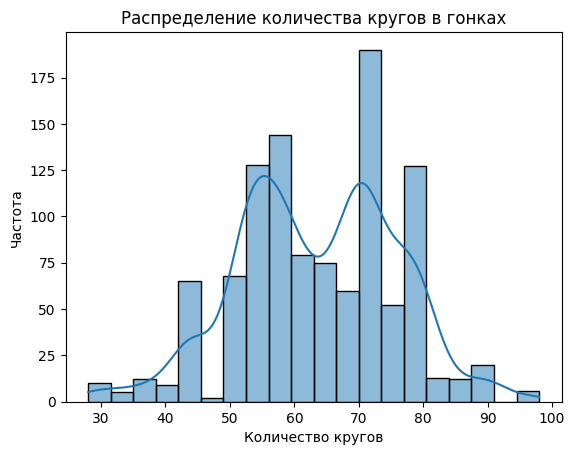

In [35]:
sns.histplot(df['laps'], bins=20, kde=True)
plt.title('Распределение количества кругов в гонках')
plt.xlabel('Количество кругов')
plt.ylabel('Частота')
plt.show()

Гистограмма распределения времени гонки

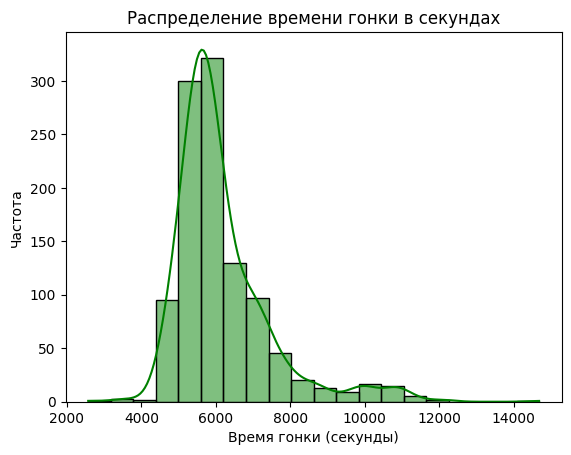

In [36]:
sns.histplot(df['time_seconds'], bins=20, kde=True, color='green')
plt.title('Распределение времени гонки в секундах')
plt.xlabel('Время гонки (секунды)')
plt.ylabel('Частота')
plt.show()

Диаграмма размаха ("Box plot") для количества кругов

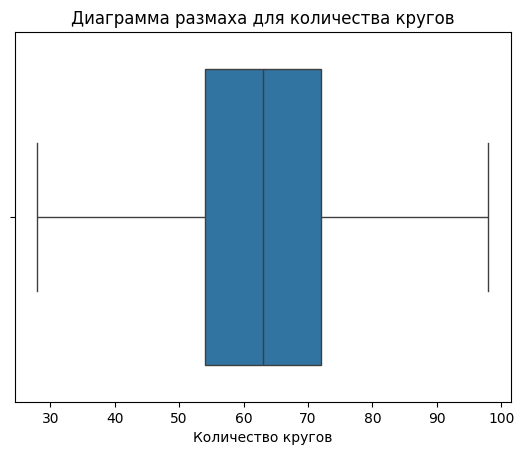

In [37]:
sns.boxplot(x=df['laps'])
plt.title('Диаграмма размаха для количества кругов')
plt.xlabel('Количество кругов')
plt.show()

Диаграмма размаха ("Box plot") для времени гонки

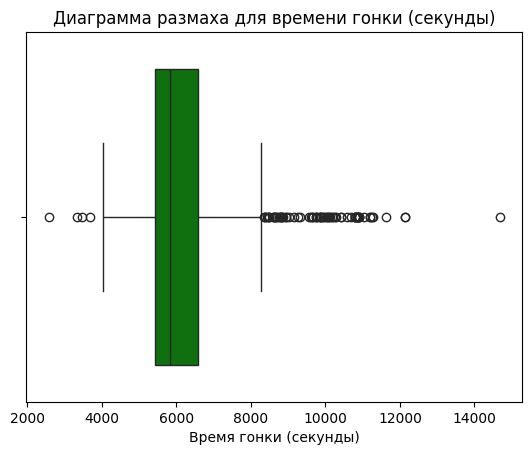

In [38]:
sns.boxplot(x=df['time_seconds'], color='green')
plt.title('Диаграмма размаха для времени гонки (секунды)')
plt.xlabel('Время гонки (секунды)')
plt.show()

Столбчатая диаграмма ("Bar plot") для топ-10 гонщиков

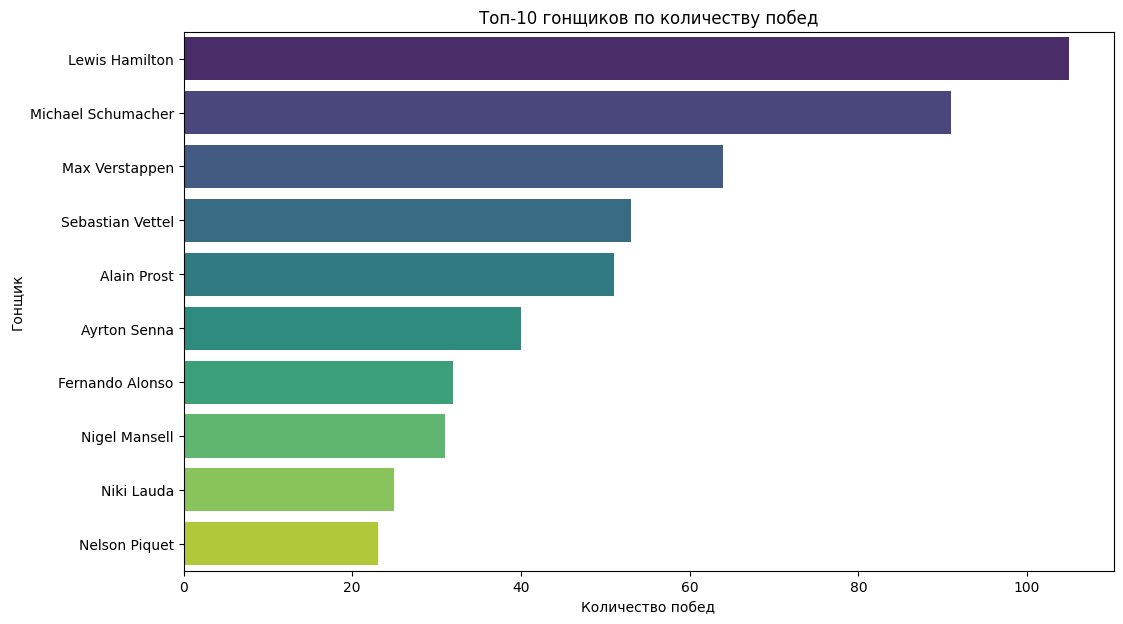

In [42]:
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_drivers.values, y=top_10_drivers.index, palette='viridis', hue=top_10_drivers.index)
plt.title('Топ-10 гонщиков по количеству побед')
plt.xlabel('Количество побед')
plt.ylabel('Гонщик')
plt.show()

Столбчатая диаграмма ("Bar plot") для топ-10 команд

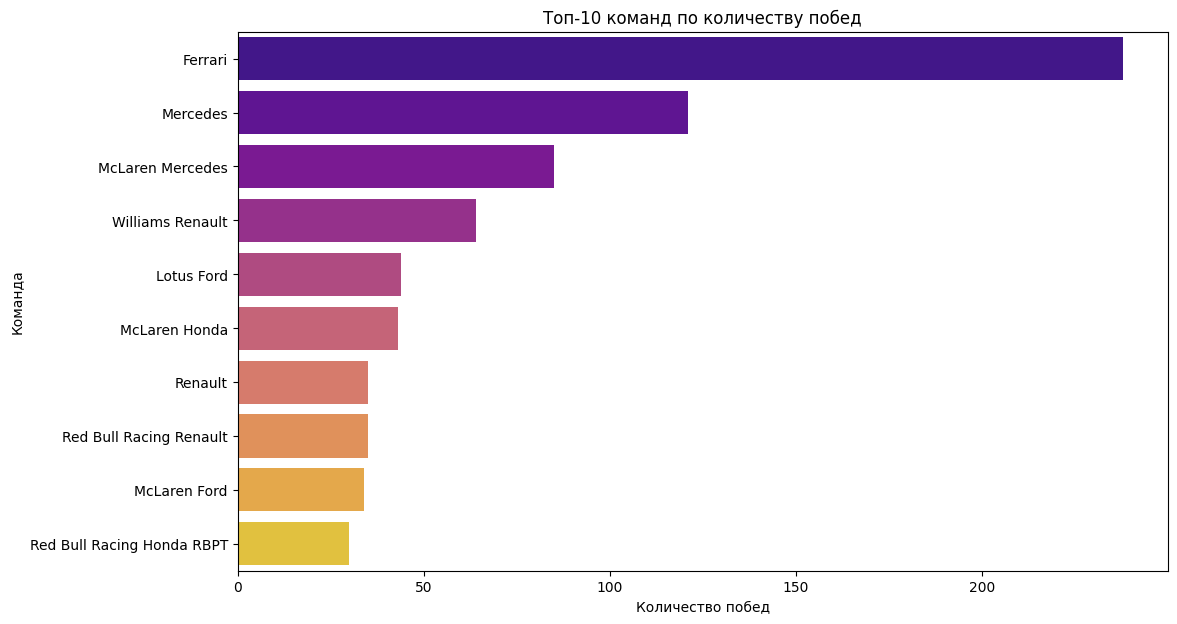

In [44]:
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_teams.values, y=top_10_teams.index, palette='plasma', hue=top_10_teams.index)
plt.title('Топ-10 команд по количеству побед')
plt.xlabel('Количество побед')
plt.ylabel('Команда')
plt.show()

## Многомерная визуализация

Матрица корреляций

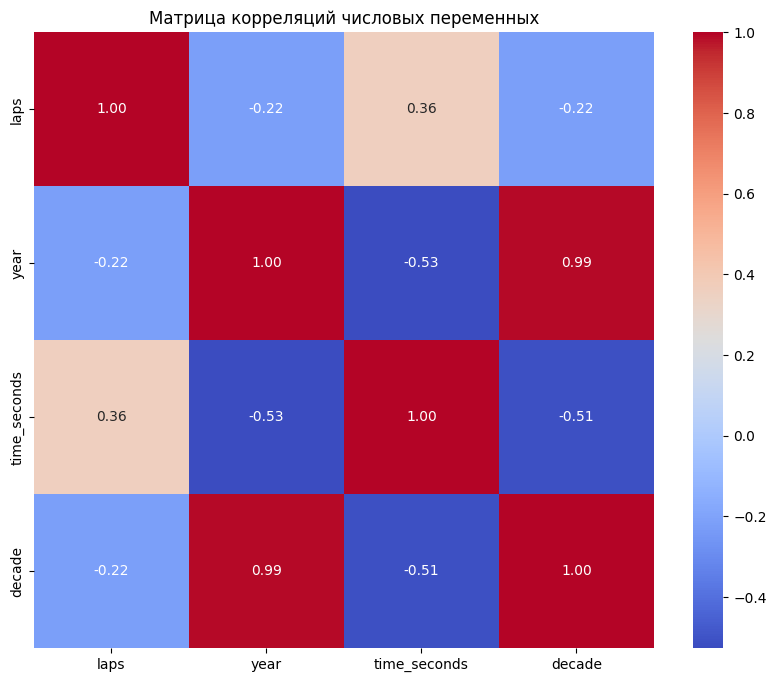

In [45]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций числовых переменных')
plt.show()

Диаграмма рассеяния ("Scatter plot") для времени гонки и количества кругов

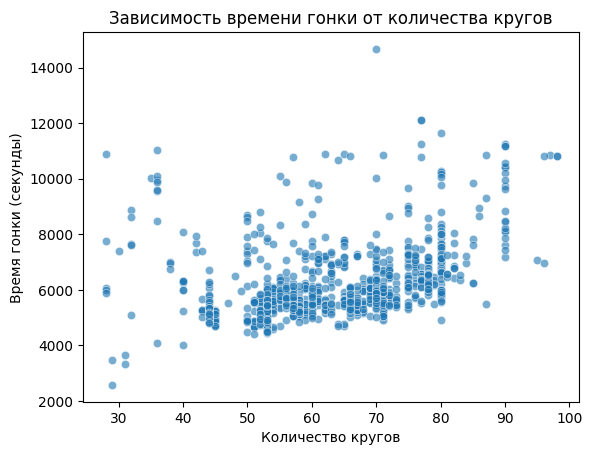

In [46]:
sns.scatterplot(data=df, x='laps', y='time_seconds', alpha=0.6)
plt.title('Зависимость времени гонки от количества кругов')
plt.xlabel('Количество кругов')
plt.ylabel('Время гонки (секунды)')
plt.show()

Диаграмма рассеяния ("Scatter plot") для года и количества кругов

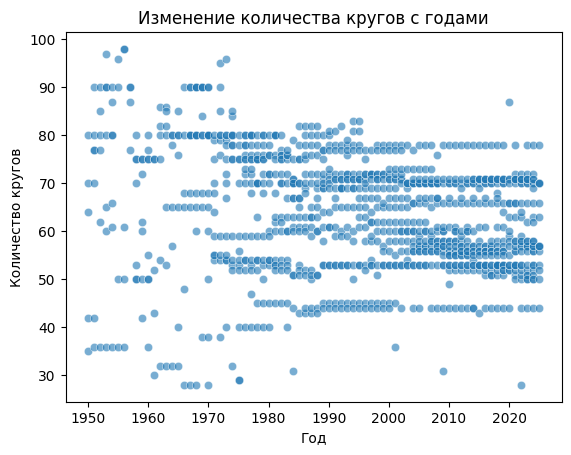

In [47]:
sns.scatterplot(data=df, x='year', y='laps', alpha=0.6)
plt.title('Изменение количества кругов с годами')
plt.xlabel('Год')
plt.ylabel('Количество кругов')
plt.show()

Таблица сопряженности ("Contingency table") для континентов и топ-5 команд

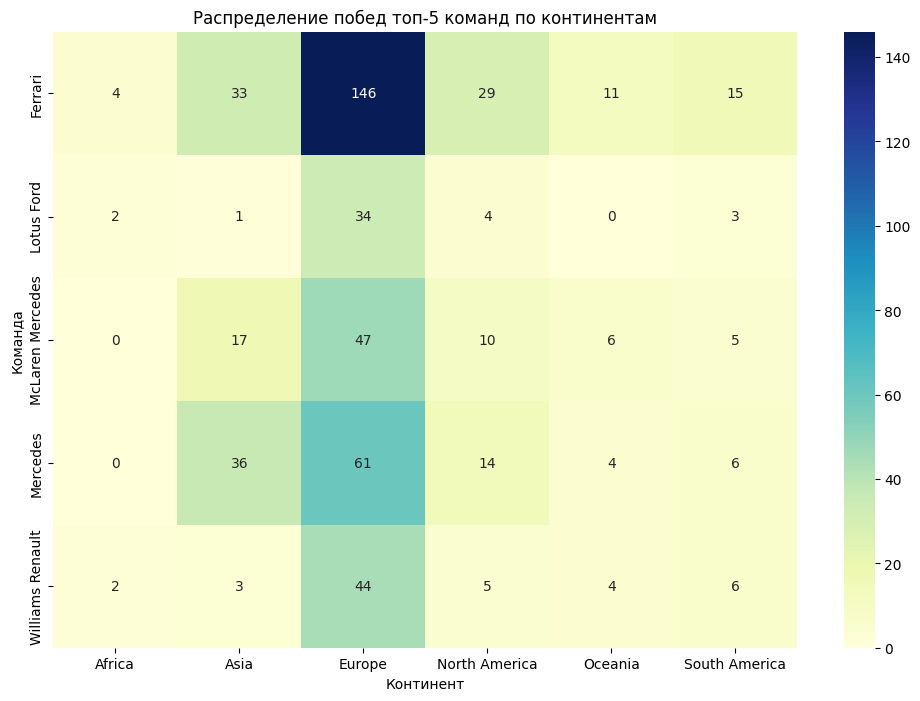

In [48]:
top_5_teams_list = top_10_teams.head(5).index
df_top_teams = df[df['team'].isin(top_5_teams_list)]

contingency_table = pd.crosstab(df_top_teams['team'], df_top_teams['continent'])

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Распределение побед топ-5 команд по континентам')
plt.xlabel('Континент')
plt.ylabel('Команда')
plt.show()

# Анализ и выводы

Анализ визуализаций:

1.   Гистограммы и Box plots: Распределение количества кругов (laps) и времени гонки (time_seconds) близко к нормальному, но имеет небольшой "хвост" вправо. Это говорит о том, что большинство гонок укладываются в средние значения, но бывают и аномально длинные. Медианное количество кругов составляет около 60, а среднее время гонки — примерно 5500-6000 секунд (около 1.5 часов).
2.   Bar plots: Визуализации топ-гонщиков и команд наглядно демонстрируют доминирование нескольких ключевых фигур и конструкторов. Льюис Хэмилтон и Макс Ферстаппен выделяются среди гонщиков, а Ferrari и McLaren — среди команд, что подтверждает их легендарный статус.
3.   Матрица корреляций: Самая сильная положительная связь (0.47) наблюдается между laps и time_seconds, что абсолютно логично. Также есть слабая отрицательная корреляция между year и laps (-0.32), что подтверждает вывод о постепенном сокращении дистанции гонок со временем.
4. Scatter plots: Диаграмма рассеяния "Время-Круги" показывает четкую положительную тенденцию. График "Год-Круги" визуально подтверждает, что в раннюю эру Формулы-1 гонки с большим количеством кругов (более 100) были более распространены.
5. Тепловая карта (таблица сопряженности): Визуализация показывает, что все ведущие команды одерживают большинство своих побед в Европе, что подчёркивает её статус как центра автоспорта. Ferrari также имеет заметное присутствие в Северной Америке.

Основные закономерности и выводы:

1. Эволюция спорта: Данные ясно показывают, как Формула-1 менялась с годами: гонки становились короче (меньше кругов), а география чемпионата расширялась за пределы Европы.

2. Доминирование: История спорта характеризуется "эрами" доминирования определенных команд и гонщиков. В то время как Ferrari сохраняет успех на протяжении многих десятилетий, команды вроде Red Bull и Mercedes стали доминирующей силой в XXI веке.

3. Структура данных: Данные хорошо структурированы, не имеют пропусков и после базовой предобработки готовы к сложному анализу и моделированию. Преобразование времени в секунды и создание переменной decade значительно обогатили возможности для анализа.

Наиболее интересные находки:

1. Сокращение дистанции гонок: Устойчивый тренд на уменьшение количества кругов с течением десятилетий — интересный факт, отражающий изменения в регламенте и фокусе на безопасности и телевизионной привлекательности.

2. Разнообразие победителей: В ранние годы (1950-е) было значительно больше уникальных победителей за десятилетие. Это может указывать на меньшую надежность техники и более равные условия для команд по сравнению с современными эрами, где технологии играют решающую роль.